# Homework 9: Mediation & Power Analyses

This homework assignment is designed to give you practice with mediation, and with using Monte Carlo methods to conduct power analyses via simulation. You won't need to load in any data for this homework.

---
## 1. Simulating data (2 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [80]:
sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
      age <- runif(sample_size, age_lo, age_hi)
      e_x <- rnorm(n=sample_size, sd=sd_x)
      e_c <- rnorm(n=sample_size, sd=sd_c)
      x <- beta_xa * age + beta_x0 + e_x
      c <- beta_ca * age + beta_cx * x + + beta_c0 + e_c 
    
      return(data.frame(age=age,x=x,c=c)) # it's actually bad form to have a variable named "c" in R, my bad...
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,x,c
,<dbl>,<dbl>,<dbl>
1,142.31646,-9.863954,64.4390772
2,180.93480,74.553021,248.3173975
3,81.28662,54.217376,0.4470857
4,132.18335,57.686869,260.1643646
5,137.23863,78.031233,480.1992805
6,167.79574,61.692047,414.0608267


---
## 2. Visualizing Data (1 point)

Load the `tidyverse` library.

In [16]:
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::select() masks MASS::select()
✖ tidyr::unpack() masks Matrix::unpack()



a) Plot the relationship between age and reading comprehension. 

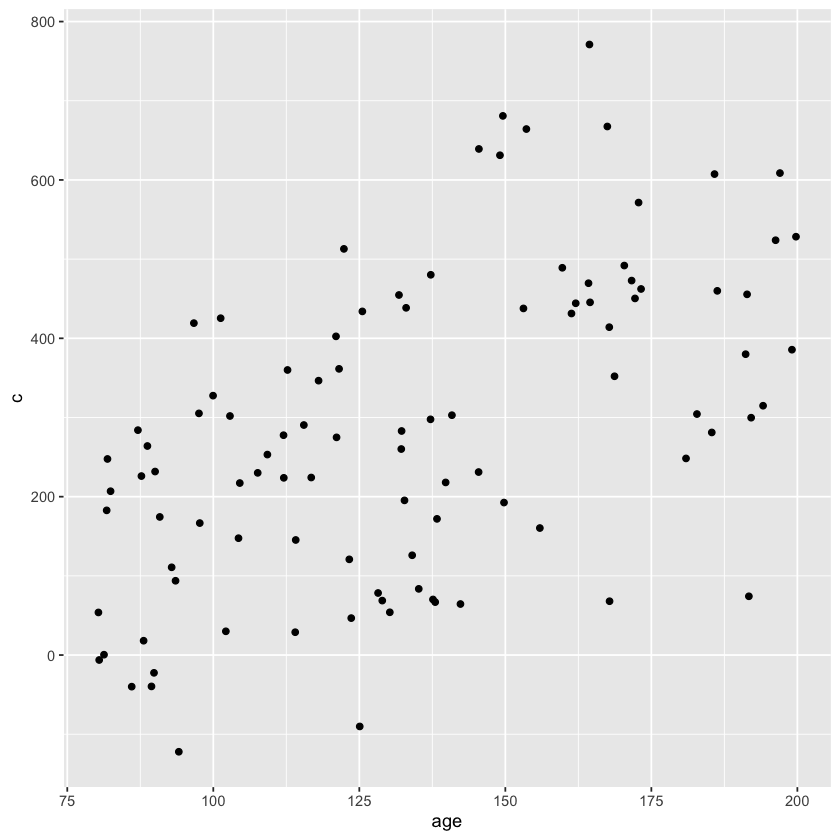

In [81]:
ggplot(dat, aes(y=c, x=age))+geom_point()


b) Plot the relationship between reading experience, age, and reading comprehension.

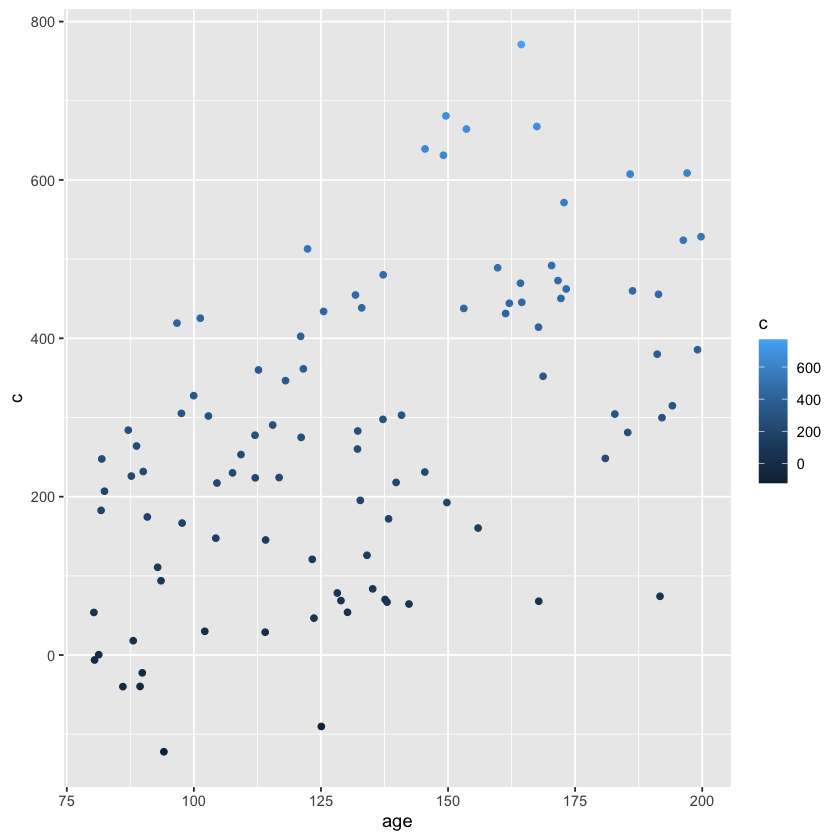

In [82]:
ggplot(dat, aes(y=c, x=age, color = c))+geom_point()



---
## 3. Mediation Analysis (3 points)

Load the `mediation` library.

In [1]:
install.packages("mediation")
library(mediation)


also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘zoo’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘mvtnorm’, ‘sandwich’, ‘lpSolve’, ‘Hmisc’





The downloaded binary packages are in
	/var/folders/m4/6fskllfx0fd1y5g7qkdx7q2h0000gn/T//RtmpldToog/downloaded_packages


Loading required package: MASS

Loading required package: Matrix

Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0




Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [83]:
fitM <- lm(x ~ age, data = dat)
fitY <- lm(c ~ age + x, data = dat)
summary(fitM)
summary(fitY)
fitMed <- mediate(fitM, fitY, treat="age", mediator="x")
summary(fitMed)



Call:
lm(formula = x ~ age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-157.828  -34.687    6.846   33.975  140.993 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -27.5119    20.5281  -1.340    0.183    
age           0.6408     0.1483   4.322 3.71e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.52 on 98 degrees of freedom
Multiple R-squared:  0.1601,	Adjusted R-squared:  0.1515 
F-statistic: 18.68 on 1 and 98 DF,  p-value: 3.712e-05



Call:
lm(formula = c ~ age + x, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-247.553  -52.083   -5.567   60.952  252.366 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -51.1761    37.1137  -1.379    0.171    
age           1.3553     0.2898   4.676 9.45e-06 ***
x             2.6425     0.1810  14.601  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 92.31 on 97 degrees of freedom
Multiple R-squared:  0.7805,	Adjusted R-squared:  0.776 
F-statistic: 172.5 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.692        0.914         2.47  <2e-16 ***
ADE               1.335        0.725         1.89  <2e-16 ***
Total Effect      3.027        2.150         3.96  <2e-16 ***
Prop. Mediated    0.563        0.365         0.74  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


How do you interpret these results? Why do you think the analysis yielded this result? 
> There is a strong mediating effect. Given this model, from ACME, I would predict that c would change significantly when I vary x but hold age constant; from ADE, I would predict that also c would change significantly when I vary age but hold x constant. There is also a significant total effect: both direct effect of age on c and age mediated through x on c. 
> 

---
## 4. Power Analysis via Simulation (4 points)

Now we're going to use our `simulate_data()` function to conduct a power analysis. The goal is to determine how many participants we would need in order to detect both the mediated and the direct effects in this data. 

*Note: We're going to pretend for the sake of simplicity that we don't have any control over the ages of the children we get (so ages are generated using `runif(sample_size, age_lo, age_hi)`, although of course this would be an unusual situation in reality.*

First, write a function, `run_analysis()`, that takes in simulated data and returns a vector containing the ACME and ADE estimates and p-values (these are the `d0`, `d0.p`, `z0`, and `z0.p` features of the mediated model object, e.g., `fitMed$d0.p`). Print this function's output for the data we simulated previously. 

In [84]:
run_analysis <- function(data){
    fitM <- lm(x ~ age, data)
    fitY <- lm(c ~ age + x, data)
    summary(fitM)
    summary(fitY)
    fitMed <- mediate(fitM, fitY, treat="age", mediator="x")
    return(c(fitMed$d0, fitMed$d0.p, fitMed$z0, fitMed$z0.p)) 
}

run_analysis(dat)


[1] 1.683116 0.000000 1.346655 0.000000

Next fill in the function `repeat_analysis()` below so that it simulates and analyzes data `num_simulations` times. Store the outputs from each simulation in the `simouts` matrix. Calculate and return the coverage across all the simulations run for both ACME and ADE.

In [85]:
repeat_analysis <- function(num_simulations, alpha, sample_size, age_lo, age_hi, 
                            beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
  # Initialize simouts matrix for storing each output from run_analysis()
  simouts <- matrix(rep(NA,num_simulations*4), nrow=num_simulations,ncol=4)
  
  # Start simulating
  for (i in 1:num_simulations) {
    data <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
    simouts[i,] <- run_analysis(data)
  }
    #print(simouts)
  # Calculate coverage for both ACME and ADE estimates using p-values in simouts
    ACME_cov =  mean(simouts[,2] <= alpha) 
    ADE_cov =  mean(simouts[,4] <= alpha) 
    
    return(list(ACME_cov = ACME_cov, ADE_cov = ADE_cov))
}

Now run the `repeat_analysis()` function using the same parameter settings as above, for 10 simulations, with an alpha criterion of 0.01. 

In [86]:
results = repeat_analysis(10, 0.01, sample_size, age_lo, age_hi, 
                beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)

results[1:2]

$ACME_cov
[1] 0.9

$ADE_cov
[1] 0.6

Finally, do the same thing (10 simulations, alpha criterion of 0.01) but for 5 different sample sizes: 50, 75, 100, 125, 150. You can do this using `map` (as in the tutorial), or a simple `for` loop, or by calculating each individually. Up to you! This should take around 3 minutes to run. 

Print your results. 

In [87]:
repeat_analysis(10, 0.01, 50, age_lo, age_hi, 
                beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)

repeat_analysis(10, 0.01, 75, age_lo, age_hi, 
                beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)

repeat_analysis(10, 0.01, 100, age_lo, age_hi, 
                beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)

repeat_analysis(10, 0.01, 125, age_lo, age_hi, 
                beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)

repeat_analysis(10, 0.01, 150, age_lo, age_hi, 
                beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)



$ACME_cov
[1] 0.5

$ADE_cov
[1] 0.3

$ACME_cov
[1] 0.8

$ADE_cov
[1] 0.6

$ACME_cov
[1] 0.8

$ADE_cov
[1] 0.7

$ACME_cov
[1] 0.8

$ADE_cov
[1] 0.7

$ACME_cov
[1] 1

$ADE_cov
[1] 1

If this were a real power analysis, we'd want to run more simulations per sample size (to get a more precise estimate of power) and we may also want to test out some other values of the parameters we used to simulate our data. However, what would you conclude just based on the results above? 

> If we want to correctly reject the null with a 95% probablity at p<0.05, then out of all the sample sizes we run, the best would be 150. 
> 

**Given** how we generated the data, why was the direct effect harder to detect than the mediated effect?
> We see how we set the combined beta for the mediated effect to be larger than the direct effect, thus it is easier to detect.  
> 

**DUE:** 5pm EST, April 11, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Eliza Reedy